Plot function so we dont have to sync the other files

In [2]:
import matplotlib.pyplot as plt

def plot_visit_counts_heatmap(visits, column_labels=None):
    """
    Plots a heat map of Q-values across columns.

    Parameters:
      q_values (array-like): A 1D array of Q-values (one per column).
      column_labels (list, optional): Labels for each column. If None, numeric labels are used.
    """
    # Convert Q-values to a NumPy array and reshape into a 1xN matrix.
    visits = np.array(visits)
    data = visits.reshape(1, -1)
    # Set up column labels if not provided.
    if column_labels is None:
        column_labels = [str(i) for i in range(data.shape[1])]

    plt.figure(figsize=(8, 2))  # adjust figure size as needed
    # Display the data as an image, 'hot' colormap highlights high values.
    heatmap = plt.imshow(data, cmap="hot", aspect="auto")

    # Add a color bar
    plt.colorbar(heatmap, label="Count")

    # Remove the y-axis ticks since there is only one row.
    plt.yticks([])
    # Set x-axis ticks to be at each column center.
    plt.xticks(ticks=np.arange(data.shape[1]), labels=column_labels)

    plt.xlabel("Column")
    plt.title("Heat Map of Visit Counts Across Columns")
    plt.show()

### Plotting Q-values/MCTS

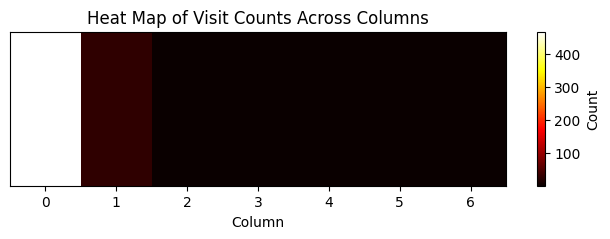

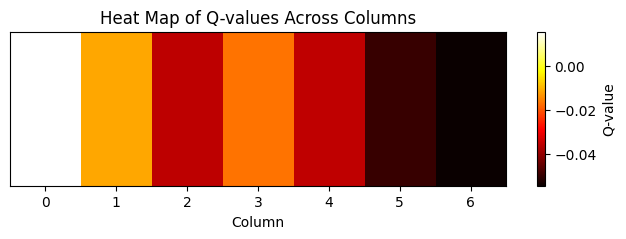

In [35]:
from agents import DQNAgent, MCTSDQNAgent
from utils import get_state_representation, plot_q_values_heatmap, get_connect_four_game, progress_to_state, visualize_board, plot_visit_counts_heatmap
import torch
import numpy as np

dqn = MCTSDQNAgent(            
       input_shape=(3,6,7),
            action_size=7,
            num_simulations=500,
            uct_c=0,
            use_dqn_evaluator=True)
dqn.mcts_wrapper.dirichlet_noise = None
# dqn.load('my_models/14-19_04_model_episode_100.pth')
dqn.load('my_models/15-12_04_model_episode_3250.pth')

# dqn.load('my_models/14-18_04_model_episode_500.pth')
# dqn.load('saved/terminal_fix/14-03_04_model_episode_500.pth')
# state = progress_to_state(get_connect_four_game(), [0,3,0,3,0])
# state = progress_to_state(get_connect_four_game(), [3,0,3,0,3,0])
# state.apply_action(3)
state = progress_to_state(get_connect_four_game(), [])
# visualize_board(state)

# TOGGLE THIS FOR DQN Q VALUES
# state = get_state_representation(state, 0)
# state_tensor = torch.FloatTensor(state).unsqueeze(0).to('cpu')
# q_values = dqn.dqn_agent.policy_net(state_tensor).detach().numpy()

# TOGGLE THIS FOR MCTS VISIT COUNT
_, q_values, counts, _ = dqn.mcts_wrapper.search(state)
q_values = list(q_values.values())
counts = list(counts.values())
plot_visit_counts_heatmap(counts)

plot_q_values_heatmap(q_values)

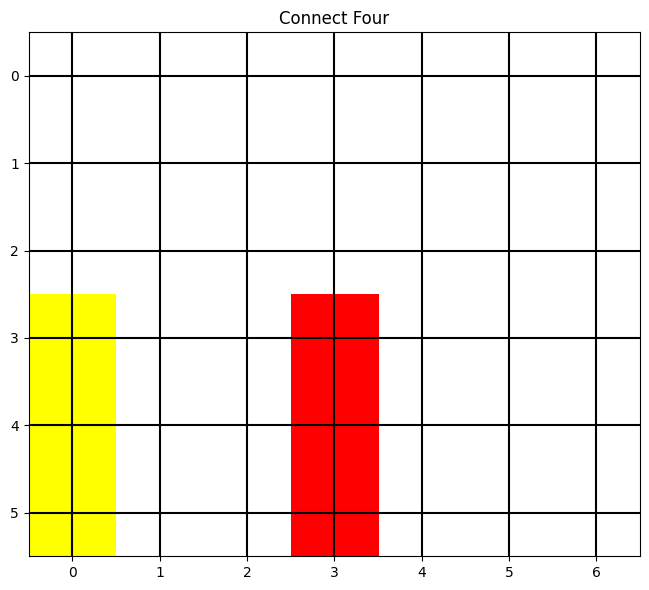

In [20]:
state = progress_to_state(get_connect_four_game(), [3,0,3,0,3,0])
visualize_board(state)

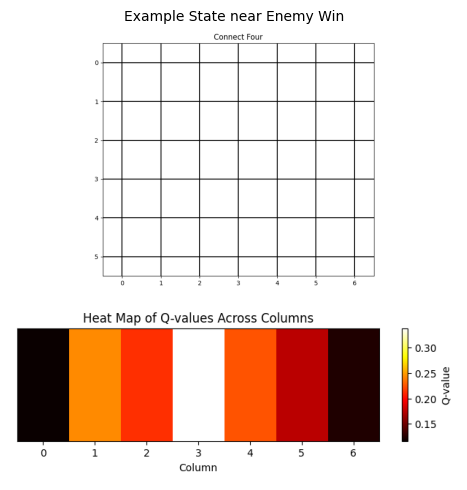

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read each image from file
heatmap_img = mpimg.imread("o0.png")
board_img = mpimg.imread("img/opening_q_values.png")

# Create a figure with two side-by-side subplots
fig, axes = plt.subplots(nrows=2, figsize=(10, 5), height_ratios=[3,2])

# Plot the second image (Connect Four board) on the right
axes[0].imshow(heatmap_img)
axes[0].set_title("Example State near Enemy Win", fontsize=10)
axes[0].axis("off")
# Plot the first image (heatmap) on the left
axes[1].imshow(board_img)
# axes[1].set_title("MCTS Visit Counts Across Columns", fontsize=10)
axes[1].axis("off")  # Hide axes for a cleaner look


plt.tight_layout()
# Save at high DPI for a publication-quality figure
plt.savefig("combined_figure.png", dpi=600, bbox_inches="tight")
plt.show()

In [59]:
from mcts_wrapper import MCTSWrapper
from utils import get_connect_four_game, progress_to_state, get_state_representation

game = get_connect_four_game() 
state = progress_to_state(game, [])
# state = progress_to_state(get_connect_four_game(), [1,0,3,0,5,0,5])
mcts = MCTSWrapper(game, num_simulations=1000)
mcts.dirichlet_noise = None
ba, aqv, ac, ap = mcts.search(state)
print(ba)
print(aqv.get(ba))
print(aqv)
print(ac.get(ba))
print(ac)
print(ap)

     3: player: 0, prior: 0.143, value:  0.288, sims:   344, outcome: none,   7 children
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
  None: player: 0, prior: 1.000, value:  0.142, sims:  1000, outcome: none,   7 children
3
0.2877906976744186
{0: np.float64(0.021052631578947368), 1: np.float64(0.02127659574468085), 3: np.float64(0.2877906976744186), 6: np.float64(-0.025), 2: np.float64(0.18324607329842932), 5:

In [5]:
from utils import get_connect_four_game, progress_to_state, get_state_representation
state = progress_to_state(get_connect_four_game(), [3])
current_player = state.current_player()
next_state = state.clone()
next_state.apply_action(3)
print(get_state_representation(state, current_player))
# print(get_state_representation(state, 1-current_player))
print(get_state_representation(next_state, current_player))
# print(get_state_representation(next_state, 1-current_player))

[[[0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]]

 [[1. 1. 1. 0. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]]]
[[[0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0.]]

 [[1. 1. 1. 0. 1. 1. 1.]
  [1. 1. 1. 0. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]]]


In [2]:
state_repr

array([[[0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[1., 1., 1., 0., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.]]])

In [15]:
next_state_repr = get_state_representation(next_state, current_player)

In [3]:
next_state_repr

array([[[0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[1., 1., 1., 0., 1., 1., 1.],
        [1., 1., 1., 0., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.]]])

In [15]:
def get_saliency_map(model, state, action_idx=None):
    """
    Computes a saliency map for a given board state.
    
    Args:
        model: The DQN model.
        state: Input state as a torch.Tensor of shape [1, channels, H, W].
        action_idx: (Optional) index of the action for which to compute gradients.
                    If None, we use the action with the highest Q-value.
                    
    Returns:
        saliency: A numpy array of shape [H, W] representing the absolute gradient 
                  (after combining over channels) with respect to the selected action.
    """
    # Ensure input requires gradients.
    state = state.clone().detach().requires_grad_(True)
    
    # Zero out previous gradients.
    model.zero_grad()
    
    # Forward pass.
    q_vals = model(state)  # shape: [1, action_size]
    
    # If no action index specified, choose the highest Q-value.
    if action_idx is None:
        action_idx = q_vals.argmax(dim=1).item()
    
    # Select the Q-value corresponding to the chosen action.
    q_val = q_vals[0, action_idx]
    
    # Compute gradients: dQ/d(state)
    q_val.backward()
    
    # Get the gradient of the input: shape: [1, channels, H, W]
    gradient = state.grad.data.abs().squeeze(0)  # shape: [channels, H, W]
    
    # Combine the gradients across channels by taking the maximum.
    saliency = gradient.max(dim=0)[0].cpu().numpy()  # shape: [H, W]
    return saliency

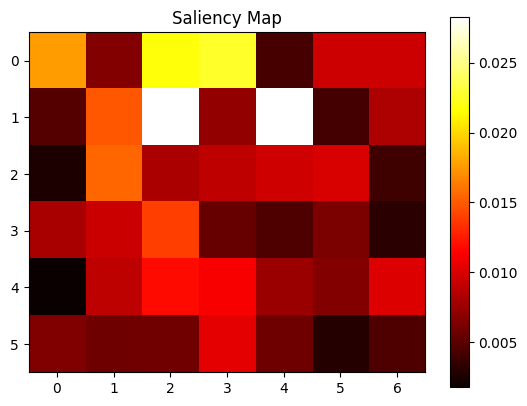

In [17]:
import torch
import matplotlib.pyplot as plt
from agents import DQNAgent, MCTSDQNAgent
from utils import get_state_representation, plot_q_values_heatmap, get_connect_four_game, progress_to_state, visualize_board, plot_visit_counts_heatmap
import numpy as np

dqn = MCTSDQNAgent(            
       input_shape=(3,6,7),
            action_size=7,
            num_simulations=500,
            use_dqn_evaluator=True)
dqn.mcts_wrapper.dirichlet_noise = None
dqn.load('saved/terminal_fix/14-15_04_model_episode_5000.pth')
# dqn.load('saved/cleon_sim_200/model_episode_4000.pth')
# state = progress_to_state(get_connect_four_game(), [0,3,0,3,0])
# state = progress_to_state(get_connect_four_game(), [3,0,3,0,3])
# state.apply_action(3)
state = progress_to_state(get_connect_four_game(), [])
# visualize_board(state)

# TOGGLE THIS FOR DQN Q VALUES
state = get_state_representation(state, 0)
state_tensor = torch.FloatTensor(state).unsqueeze(0).to('cpu')
# And assume model is your trained DQN network
saliency = get_saliency_map(dqn.dqn_agent.policy_net, state_tensor)
plt.imshow(saliency, cmap='hot', interpolation='nearest')
plt.title("Saliency Map")
plt.colorbar()
plt.show()

In [ ]:
import torch

if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print(x)
else:
    print("MPS device not found.")

AssertionError: Torch not compiled with CUDA enabled